# Predict the miles per gallon for a car
In this lab you'll be building a model to predict the miles per gallon for a car.
The lab is based on a open dataset from [the UCI machine learning database](https://archive.ics.uci.edu/ml/index.php). 

At the end of this lab you'll have a working model that you can deploy and use.
Follow the steps in this lab to train the model.

We'll cover the following topics:

* Loading data
* Preparing the data
* Training a linear regression model
* Using metrics for validation

## Step 1: Loading data
The first step in the process of building the model is to load the data from disk. 
The data is contained in a file called `auto-mpg.csv`. 

Use the pandas function [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) to load the data and store it in a variable `df_milage`.

In [29]:
import pandas as pd

In [30]:
df_milage = pd.read_csv('auto-mpg.csv')

## Step 2: Verify the data 
Linear regression models work because they are based on the assumption that there's a correlation between the input variables you choose and the output that you want to predict. So before we actually build the model, we need to select features that are correlated to the MPG value of a car.

First step is to look at the correlation between the inputs and the outputs. A good way to see correlations between the input features and the output is to make a correlation heatmap.

Use the [corr](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.corr.html) method on your dataframe to calculate the pearson correlation coefficient. Then use the [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function from the seaborn package to visualize the heatmap for the correlations.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

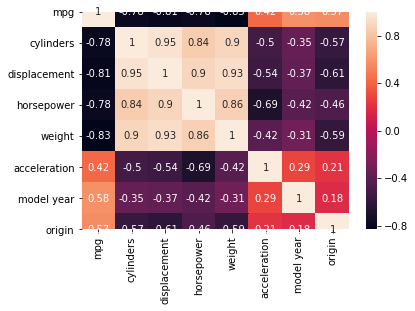

In [32]:
sns.heatmap(df_milage.corr(), annot=True)
plt.show()

Which correlations looks strong and could be useful features for our model? 

## Step 3: Preparing the data

For this regression problem we are going to build a Linear Regression Model. 
First, we need to select our input features and our output target.

Select the `MPG` column from the `df_milage` data frame and store it in the variable `y`.

In [33]:
y = df_milage[['mpg']]

Next, select the other columns in the `df_milage` data frame and store them in the variable `X`.

In [34]:
X = df_milage[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]

Then, we need to create a training and validation set.
The training set will be used to train the model to predict miles per gallon.
The validation set is later used to make sure our model isn't just remembering the values it has seen.

Use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split the data frames `X` and `y` into a training and test set.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Step 4: Training a linear regression model

Now that we have our data preprared, we're ready to train a model. If we want to predict the miles per gallon for a car, we're going to have to train a linear regression model. Use the [LinearRegression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) class and train a linear regression model using the training set you just created.

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 5 : Using metrics for validation
Now that you have a model it is important to test whether the model fits the data well enough. For this we're going to use the `score` method on the model that you've trained. This returns [the R-squared score](http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit). This score expresses how well the observations fit the line you've trained.

In [39]:
regression_model.score(X_test, y_test)

0.8303006006841891